In [1]:
import os
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file='b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.ACTREL.200001-200912.nc'
varname = file.split('.')[-3]
f = netCDF4.Dataset(file, 'r')
lat = np.zeros((192,288))
lon = np.zeros((192,288))
varval = np.zeros((192,288))
print(varname + ': ' + str(f.variables[varname].shape))
for i, latbin in enumerate(f.variables['lat']):
    for j, lonbin in enumerate(f.variables['lon']):
        lat[i][j] = latbin
        lon[i][j] = lonbin
        varval[i][j] = f.variables[varname][49][i][j] #January 2004
binned = rebin(f.variables[varname][49], f.variables['lon'], f.variables['lat'])
latbins = np.repeat(np.linspace(-90, 90, 32), 64)
lonbins = np.tile(np.linspace(0, 360., 64), 32)
f.close()
np.savetxt(f'binned/{varname}.txt', binned)

ACTREL: (120, 192, 288)


In [25]:
def rebin(inarr, inlon, inlat):
    latbin_centers = np.linspace(-90., 90., 32)
    lonbin_centers = np.linspace(0., 360., 64)
    data_binned = np.zeros((32, 64))
    npoints = np.zeros((32, 64))
    for i in range(len(inarr)):
        latbin_idx = np.argmin(np.abs(inlat[i] - latbin_centers))
        for j in range(len(inarr[i])):
            lonbin_idx = np.argmin(np.abs(inlon[j] - lonbin_centers))
            data_binned[latbin_idx][lonbin_idx] += inarr[i][j]
            npoints[latbin_idx][lonbin_idx] += 1
    data_binned /= npoints
    return data_binned

for file in os.listdir('.'):
    if 'b.e21' in file and file[-3:]=='.nc':
        varname = file.split('.')[-3]
        try:
            f = netCDF4.Dataset(file, 'r')
            lat = np.zeros((192,288))
            lon = np.zeros((192,288))
            varval = np.zeros((192,288))
            if len(f.variables[varname].shape) == 3 and f'{varname}.txt' not in os.listdir('binned/'):
                print(varname + ': ' + str(f.variables[varname].shape))
                for i, latbin in enumerate(f.variables['lat']):
                    for j, lonbin in enumerate(f.variables['lon']):
                        lat[i][j] = latbin
                        lon[i][j] = lonbin
                        varval[i][j] = f.variables[varname][49][i][j] #January 2004
                binned = rebin(f.variables[varname][49], f.variables['lon'], f.variables['lat'])
#                 latbins = np.repeat(np.linspace(-90, 90, 32), 64)
#                 lonbins = np.tile(np.linspace(0, 360., 64), 32)
                f.close()
                np.savetxt(f'binned/{varname}.txt', binned)
        except:
            print(f'couldn\'t read {file}')


couldn't read b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.H2SO4_SRF.200001-200912.nc
couldn't read b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.HNO3_STS.200001-200912.nc
couldn't read b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.HO2.200001-200912.nc
ICEFRAC: (120, 192, 288)
LANDFRAC: (120, 192, 288)
LHFLX: (120, 192, 288)
LWCF: (120, 192, 288)
MSKtem: (120, 192, 288)
ncl_a1DDF: (120, 192, 288)
ncl_a1SF: (120, 192, 288)
ncl_a1SFWET: (120, 192, 288)
ncl_a1_SRF: (120, 192, 288)
ncl_a2DDF: (120, 192, 288)
ncl_a2SF: (120, 192, 288)
ncl_a2SFWET: (120, 192, 288)
ncl_a2_SRF: (120, 192, 288)
ncl_a3DDF: (120, 192, 288)
ncl_a3SF: (120, 192, 288)
ncl_a3SFWET: (120, 192, 288)
ncl_a3_SRF: (120, 192, 288)
ncl_c1SFWET: (120, 192, 288)
ncl_c2SFWET: (120, 192, 288)
ncl_c3SFWET: (120, 192, 288)
num_a1DDF: (120, 192, 288)
num_a1SF: (120, 192, 288)
num_a1SFWET: (120, 192, 288)
num_a1_CLXF: (120, 192, 288)
num_a1_CMXF: (120, 192, 288)
num_a1_SRF: (120, 192, 288)
num_a2DDF: (120, 192, 288)
num_a2SF: (120, 1

/tmp/ipykernel_3052/2777658886.py:15: UserWarning: Warning: converting a masked element to nan.
  varval[i][j] = f.variables[varname][49][i][j] #January 2004
/tmp/ipykernel_3052/636196465.py:11: UserWarning: Warning: converting a masked element to nan.
  data_binned[latbin_idx][lonbin_idx] += inarr[i][j]


SST: (120, 192, 288)
SWCF: (120, 192, 288)
TAUBLJX: (120, 192, 288)
TAUBLJY: (120, 192, 288)
TAUGWX: (120, 192, 288)
TAUGWY: (120, 192, 288)
TAUX: (120, 192, 288)
TAUY: (120, 192, 288)
TGCLDCWP: (120, 192, 288)
TGCLDIWP: (120, 192, 288)
TGCLDLWP: (120, 192, 288)
TMCO2: (120, 192, 288)
TMCO2_FFF: (120, 192, 288)
TMCO2_LND: (120, 192, 288)
TMCO2_OCN: (120, 192, 288)
TMDMS: (120, 192, 288)
TMQ: (120, 192, 288)
TMSO2: (120, 192, 288)
TMso4_a1: (120, 192, 288)
TMso4_a2: (120, 192, 288)
TMso4_a3: (120, 192, 288)
TREFHT: (120, 192, 288)
TREFHTMN: (120, 192, 288)
TREFHTMX: (120, 192, 288)
TROP_P: (120, 192, 288)
TROP_T: (120, 192, 288)
TROP_Z: (120, 192, 288)
TS: (120, 192, 288)
TSMN: (120, 192, 288)
TSMX: (120, 192, 288)
U10: (120, 192, 288)
WD_H2O2: (120, 192, 288)
WD_H2SO4: (120, 192, 288)
WD_SO2: (120, 192, 288)
wet_deposition_NHx_as_N: (120, 192, 288)
wet_deposition_NOy_as_N: (120, 192, 288)
WSPDSRFAV: (120, 192, 288)
WSPDSRFMX: (120, 192, 288)


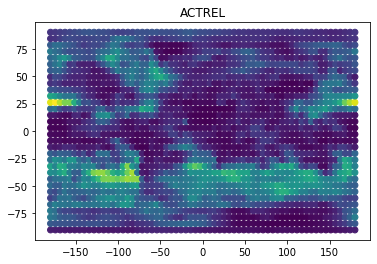

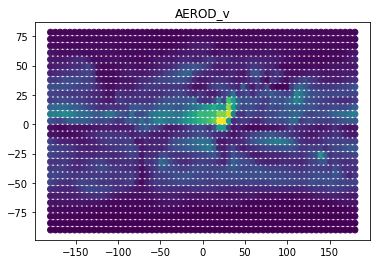

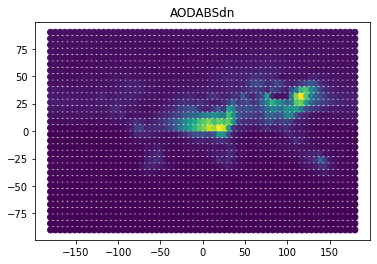

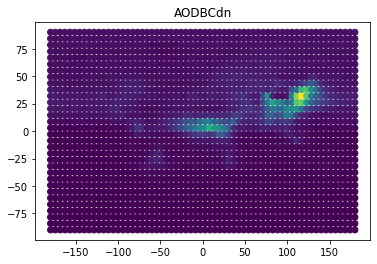

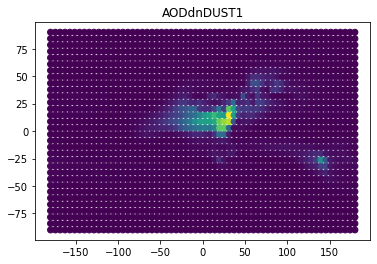

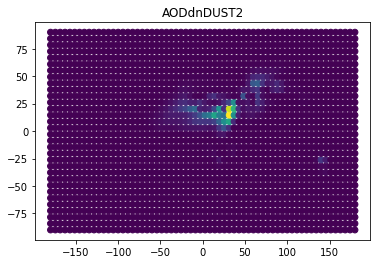

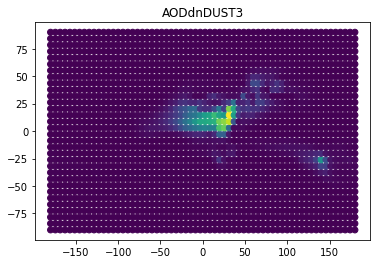

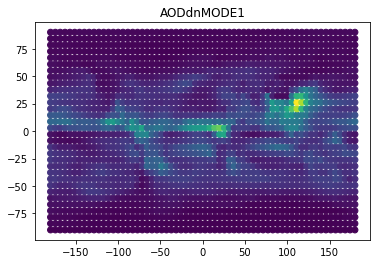

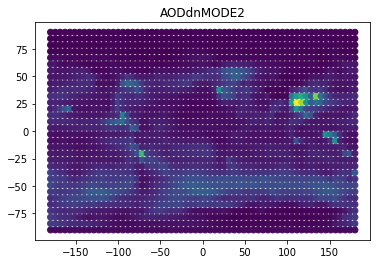

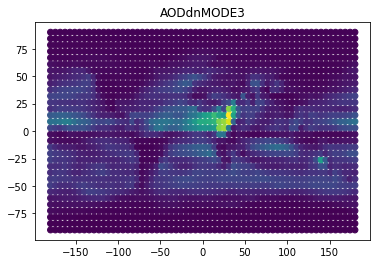

<Figure size 432x288 with 0 Axes>

In [60]:
latbins = np.repeat(np.linspace(-90, 90, 32), 64)
lonbins = np.tile(np.linspace(-180, 180, 64), 32)
for filename in os.listdir('binned')[:10]:
    dat = np.loadtxt(f'binned/{filename}')
    dat = np.hstack([dat[:, 32:], dat[:, :32]]) #difference in longitude convention b/w sciamachy and ccsm3 data
    plt.scatter(lonbins, latbins, c=dat)
    plt.title(filename.split('.')[0])
    plt.show()
    plt.clf()

In [44]:
#consolidate all data into a lat-lon dataframe
import pandas as pd
keys = [s.split('.')[0] for s in os.listdir('binned')]
df = pd.DataFrame(columns=list(keys))
latbins = np.linspace(-90, 90, 32)
lonbins = np.linspace(-180, 180, 64)
for lat in range(len(latbins)):
    for lon in range(len(lonbins)):
        print(f'{lat}, {lon}')
        latlondata = {}
        for filename in os.listdir('binned'):
            dat = np.loadtxt(f'binned/{filename}')
            dat = np.hstack([dat[:, 32:], dat[:, :32]])
            key = filename.split('.')[0]
            latlondata[key] = dat[lat][lon]

        if set(latlondata.values()) != {0.0}: #ignore lat-lon bins which are all 0
            latlondata['lat'] = latbins[lat]
            latlondata['lon'] = lonbins[lon]
            df = df.append(latlondata, ignore_index=True)
df.head()

0, 0
0, 1
0, 2
0, 3
0, 4
0, 5
0, 6
0, 7
0, 8
0, 9
0, 10
0, 11
0, 12
0, 13
0, 14
0, 15
0, 16
0, 17
0, 18
0, 19
0, 20
0, 21
0, 22
0, 23
0, 24
0, 25
0, 26
0, 27
0, 28
0, 29
0, 30
0, 31
0, 32
0, 33
0, 34
0, 35
0, 36
0, 37
0, 38
0, 39
0, 40
0, 41
0, 42
0, 43
0, 44
0, 45
0, 46
0, 47
0, 48
0, 49
0, 50
0, 51
0, 52
0, 53
0, 54
0, 55
0, 56
0, 57
0, 58
0, 59
0, 60
0, 61
0, 62
0, 63
1, 0
1, 1
1, 2
1, 3
1, 4
1, 5
1, 6
1, 7
1, 8
1, 9
1, 10
1, 11
1, 12
1, 13
1, 14
1, 15
1, 16
1, 17
1, 18
1, 19
1, 20
1, 21
1, 22
1, 23
1, 24
1, 25
1, 26
1, 27
1, 28
1, 29
1, 30
1, 31
1, 32
1, 33
1, 34
1, 35
1, 36
1, 37
1, 38
1, 39
1, 40
1, 41
1, 42
1, 43
1, 44
1, 45
1, 46
1, 47
1, 48
1, 49
1, 50
1, 51
1, 52
1, 53
1, 54
1, 55
1, 56
1, 57
1, 58
1, 59
1, 60
1, 61
1, 62
1, 63
2, 0
2, 1
2, 2
2, 3
2, 4
2, 5
2, 6
2, 7
2, 8
2, 9
2, 10
2, 11
2, 12
2, 13
2, 14
2, 15
2, 16
2, 17
2, 18
2, 19
2, 20
2, 21
2, 22
2, 23
2, 24
2, 25
2, 26
2, 27
2, 28
2, 29
2, 30
2, 31
2, 32
2, 33
2, 34
2, 35
2, 36
2, 37
2, 38
2, 39
2, 40
2, 41
2, 42
2, 4

20, 12
20, 13
20, 14
20, 15
20, 16
20, 17
20, 18
20, 19
20, 20
20, 21
20, 22
20, 23
20, 24
20, 25
20, 26
20, 27
20, 28
20, 29
20, 30
20, 31
20, 32
20, 33
20, 34
20, 35
20, 36
20, 37
20, 38
20, 39
20, 40
20, 41
20, 42
20, 43
20, 44
20, 45
20, 46
20, 47
20, 48
20, 49
20, 50
20, 51
20, 52
20, 53
20, 54
20, 55
20, 56
20, 57
20, 58
20, 59
20, 60
20, 61
20, 62
20, 63
21, 0
21, 1
21, 2
21, 3
21, 4
21, 5
21, 6
21, 7
21, 8
21, 9
21, 10
21, 11
21, 12
21, 13
21, 14
21, 15
21, 16
21, 17
21, 18
21, 19
21, 20
21, 21
21, 22
21, 23
21, 24
21, 25
21, 26
21, 27
21, 28
21, 29
21, 30
21, 31
21, 32
21, 33
21, 34
21, 35
21, 36
21, 37
21, 38
21, 39
21, 40
21, 41
21, 42
21, 43
21, 44
21, 45
21, 46
21, 47
21, 48
21, 49
21, 50
21, 51
21, 52
21, 53
21, 54
21, 55
21, 56
21, 57
21, 58
21, 59
21, 60
21, 61
21, 62
21, 63
22, 0
22, 1
22, 2
22, 3
22, 4
22, 5
22, 6
22, 7
22, 8
22, 9
22, 10
22, 11
22, 12
22, 13
22, 14
22, 15
22, 16
22, 17
22, 18
22, 19
22, 20
22, 21
22, 22
22, 23
22, 24
22, 25
22, 26
22, 27
22, 28
22, 2

,ACTREL,AEROD_v,AODABSdn,AODBCdn,AODdnDUST1,AODdnDUST2,AODdnDUST3,AODdnMODE1,AODdnMODE2,AODdnMODE3,...,U10,WD_H2O2,WD_H2SO4,WD_SO2,wet_deposition_NHx_as_N,wet_deposition_NOy_as_N,WSPDSRFAV,WSPDSRFMX,lat,lon
0,0.500813,0.007699,0.000503,0.000466,0.000051,2.952379e-10,0.000091,0.004034,0.000013,0.000754,...,5.217656,-4.615256e-29,3.657598e-32,-8.397064e-30,0.0,0.0,6.964841,16.341344,-90.0,-180.000000
1,0.483753,0.007696,0.000502,0.000465,0.000051,2.927368e-10,0.000091,0.004028,0.000013,0.000757,...,5.322373,-1.782917e-31,-9.950331e-32,-7.190952e-30,0.0,0.0,7.102973,15.996960,-90.0,-174.285714
2,0.442584,0.007698,0.000501,0.000464,0.000051,2.904845e-10,0.000091,0.004027,0.000013,0.000762,...,5.406744,-5.032610e-30,-4.112761e-32,-5.143216e-30,0.0,0.0,7.219886,15.644550,-90.0,-168.571429
3,0.416585,0.007705,0.000500,0.000463,0.000051,2.886185e-10,0.000091,0.004030,0.000014,0.000766,...,5.479064,-2.990339e-30,2.887496e-32,8.287507e-31,0.0,0.0,7.311817,15.355980,-90.0,-162.857143
4,0.407955,0.007711,0.000499,0.000462,0.000051,2.871093e-10,0.000090,0.004034,0.000014,0.000770,...,5.511491,-3.541048e-29,3.949572e-32,2.124808e-30,0.0,0.0,7.378526,15.091929,-90.0,-157.142857


In [56]:
df.to_csv('alldata_binned.csv')

In [57]:
#now we can just follow the standard PCA procedure
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df = df.dropna()
features = list(df.keys())
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5',
                                                                 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'])

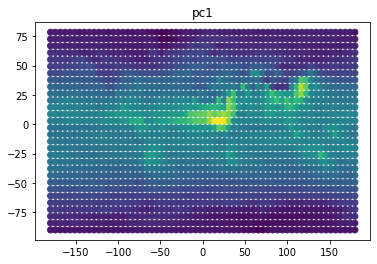

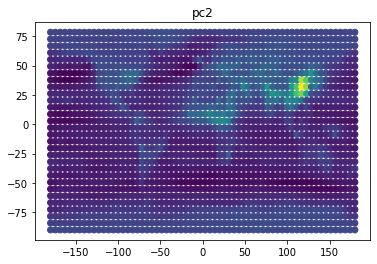

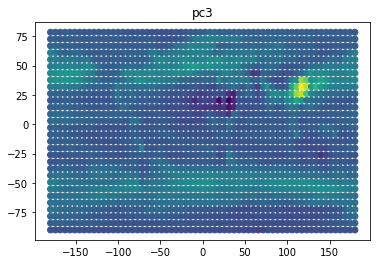

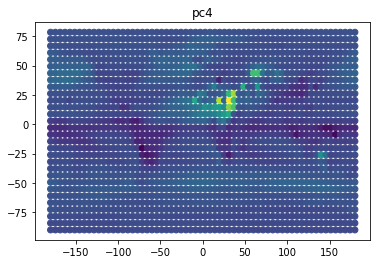

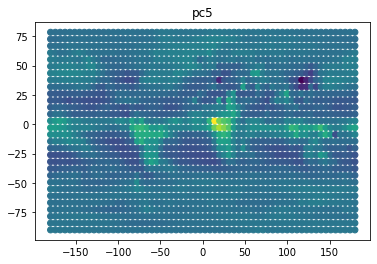

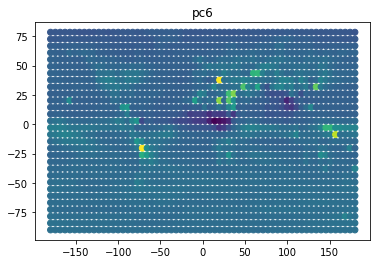

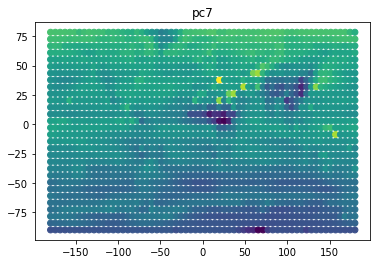

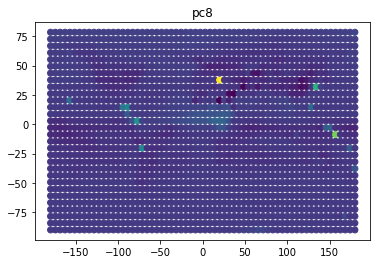

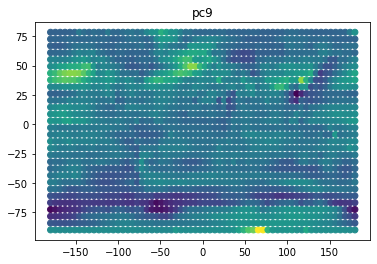

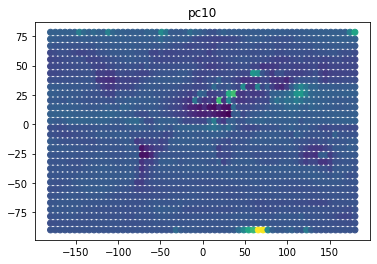

<Figure size 432x288 with 0 Axes>

In [58]:
for pc in principalDf.columns:
    plt.scatter(df['lon'], df['lat'], c=list(principalDf[pc]))
    plt.title(f'{pc}')
    plt.show()
    plt.clf()

Text(0, 0.5, 'Variance Fraction (%)')

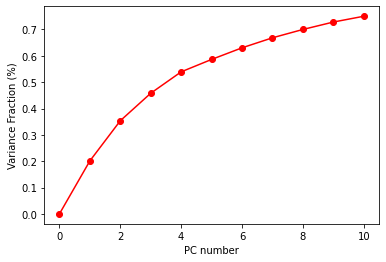

In [59]:
frac = []
for i in range(11):
    frac.append(np.sum(pca.explained_variance_ratio_[:i]))
plt.plot(frac, marker='o', color='r')
plt.xlabel('PC number')
plt.ylabel('Variance Fraction (%)')